## Visualizing Activations

In order to learn more about what's going on inside of a neural network we can visualize the internal activations as we train it. Today we'll look at the pre-trained and uninitialized version of ResNet-18 as they train against the MNIST dataset.

In particular, we'll look at the output of the first convolutional layer and each of the residual blocks.

In [123]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.callbacks import HookCallback

In [124]:
path = untar_data(URLs.MNIST)

We need to create a hook that keeps track of the activations at each training set. We'll use `.histc` to bucket the activations into 40 groups.

In [125]:
# Modified from: https://forums.fast.ai/t/confused-by-output-of-hook-output/29514/4
class StoreHook(HookCallback):
    def on_train_begin(self, **kwargs):
        super().on_train_begin(**kwargs)
        self.hists = []
        
    def hook(self, m, i, o): 
        return o
    
    def on_batch_end(self, train, **kwargs): 
        if (train): 
            self.hists.append(self.hooks.stored[0].cpu().histc(40,0,10))

In [133]:
# Simply pass in a learner and the module you would like to instrument
def probeModule(learn, module):
    hook = StoreHook(learn, modules=flatten_model(module))
    learn.callbacks += [ hook ]
    return hook

## Pretrained ResNet-18 

We'll start by looking at the **pretrained** ResNet-18 as it goes through three epochs of training.

In [126]:
#Note: We're using a large validation size so we don't generate super wide graphs
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.5, ds_tfms=get_transforms(), size=32, num_workers=4).normalize(imagenet_stats)
learn = cnn_learner(data, models.resnet18, pretrained=True, metrics=[error_rate])

In [129]:
#Hook the output of the first conv and each resnet block.
hooks = [probeModule(learn, learn.model[0][0]),
         probeModule(learn, learn.model[0][4]),
         probeModule(learn, learn.model[0][5]),
         probeModule(learn, learn.model[0][6]),
         probeModule(learn, learn.model[0][7])]

names = ['conv1',
         'conv2_x',
         'conv3_x',
         'conv4_x',
         'conv5_x']

learn.fit(3, lr=1e-2)

epoch,train_loss,valid_loss,error_rate,time
0,0.282094,0.183733,0.056000,00:19
1,0.225221,0.099357,0.031229,00:19
2,0.178384,0.102886,0.033000,00:19


In [147]:
# Thanks to @ste for initial version of histgram plotting code
def get_hist(h): 
    return torch.stack(h.hists).t().float().log1p()

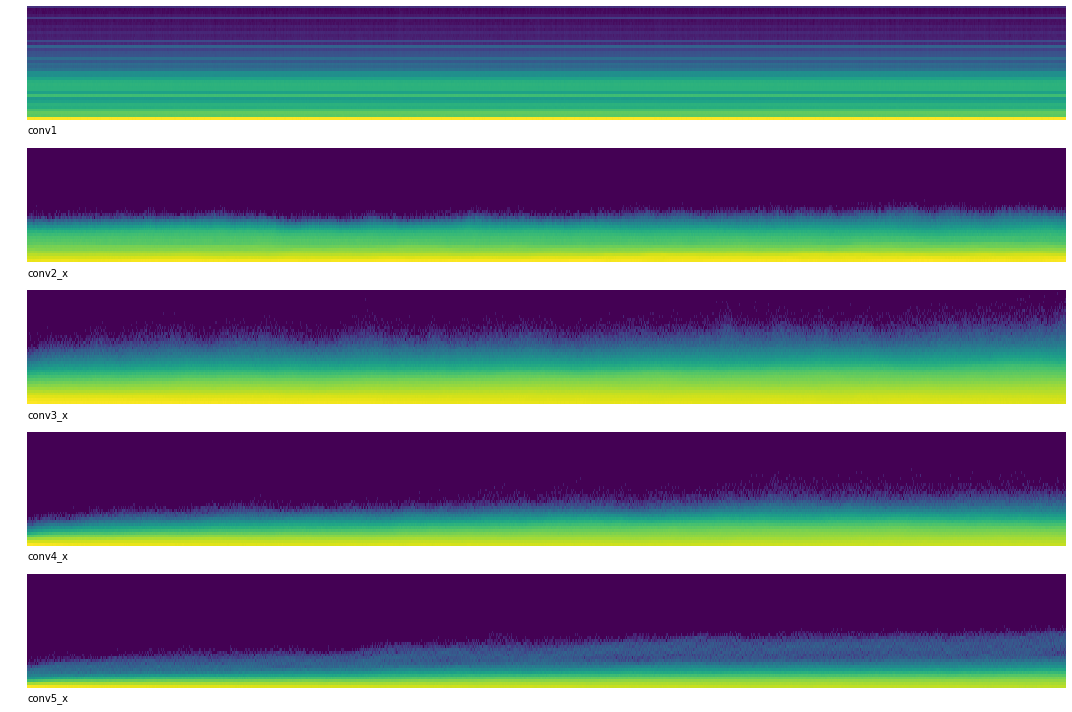

In [132]:
fig,axes = plt.subplots(5, figsize=(15,10))

for i, (ax,h) in enumerate(zip(axes.flatten(), hooks)):
    ax.imshow(get_hist(h), origin='lower', aspect='auto')
    ax.axis('off')
    ax.text(0, -5, names[i], bbox={'facecolor':'red', 'alpha':0.0, 'pad':10})
plt.tight_layout()

Some interesting notes:
 - The first convolutional layer's activations don't appear to change much. 
 - You can see the latter layers start to use larger values as training progresses

## Untrained ResNet-18 Activations

In [134]:
#Note: We're using a large validation size so we don't generate super wide graphs
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.5, ds_tfms=get_transforms(), size=32, num_workers=4).normalize(imagenet_stats)
learn = cnn_learner(data, models.resnet18, pretrained=False, metrics=[error_rate])

In [135]:
#Hook the output of the first conv and each resnet block.
hooks = [probeModule(learn, learn.model[0][0]),
         probeModule(learn, learn.model[0][4]),
         probeModule(learn, learn.model[0][5]),
         probeModule(learn, learn.model[0][6]),
         probeModule(learn, learn.model[0][7])]

names = ['conv1',
         'conv2_x',
         'conv3_x',
         'conv4_x',
         'conv5_x']

learn.fit(3, lr=1e-2)

epoch,train_loss,valid_loss,error_rate,time
0,0.323390,0.206507,0.055257,00:22
1,0.235165,0.175481,0.049057,00:22
2,0.171851,0.115217,0.034486,00:22


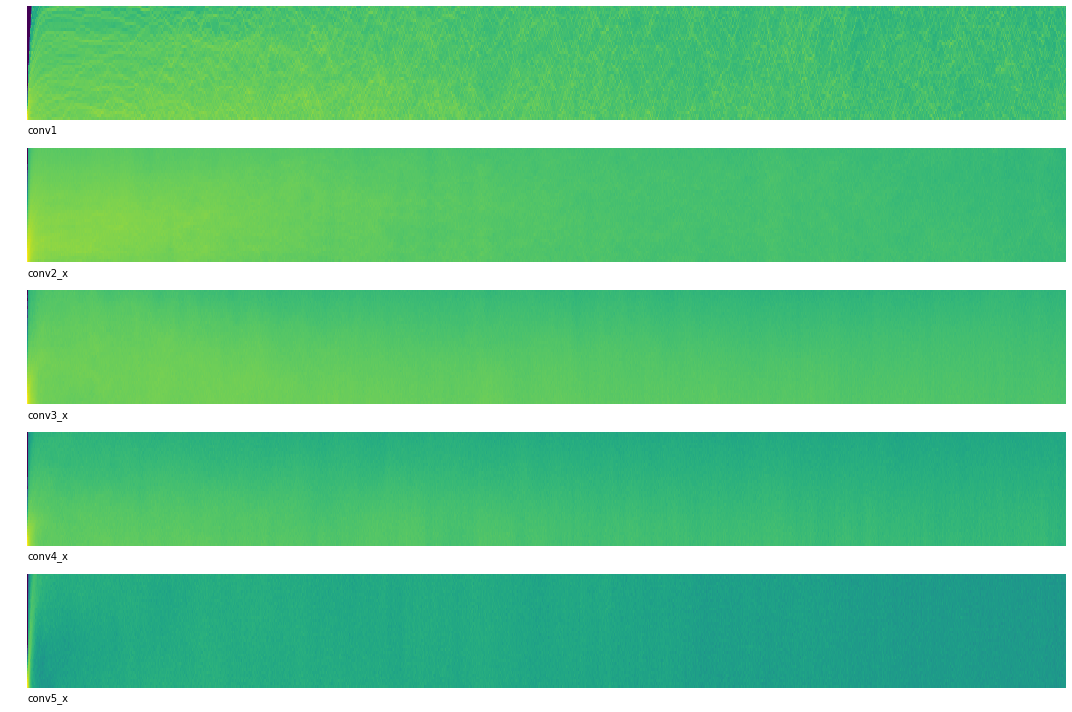

In [136]:
fig,axes = plt.subplots(5, figsize=(15,10))

for i, (ax,h) in enumerate(zip(axes.flatten(), hooks)):
    ax.imshow(get_hist(h), origin='lower', aspect='auto')
    ax.axis('off')
    ax.text(0, -5, names[i], bbox={'facecolor':'red', 'alpha':0.0, 'pad':10})
plt.tight_layout()

- All layer activations appear to change considerably from where they started
- We get about the same error rate as the pre-trained model

## Let's Break the Pretrained Model

In [145]:
#Note: We're using a large validation size so we don't generate super wide graphs
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.5, ds_tfms=get_transforms(), size=32, num_workers=4).normalize(imagenet_stats)
learn = cnn_learner(data, models.resnet18, pretrained=True, metrics=[error_rate])

In [146]:
#Hook the output of the first conv and each resnet block.
hooks = [probeModule(learn, learn.model[0][0]),
         probeModule(learn, learn.model[0][4]),
         probeModule(learn, learn.model[0][5]),
         probeModule(learn, learn.model[0][6]),
         probeModule(learn, learn.model[0][7])]

names = ['conv1',
         'conv2_x',
         'conv3_x',
         'conv4_x',
         'conv5_x']

learn.fit(3, lr=1e-1)

epoch,train_loss,valid_loss,error_rate,time
0,1.482907,1.463650,0.276029,00:20
1,1.399036,3.400144,0.352229,00:20
2,1.232002,1.564935,0.196314,00:19


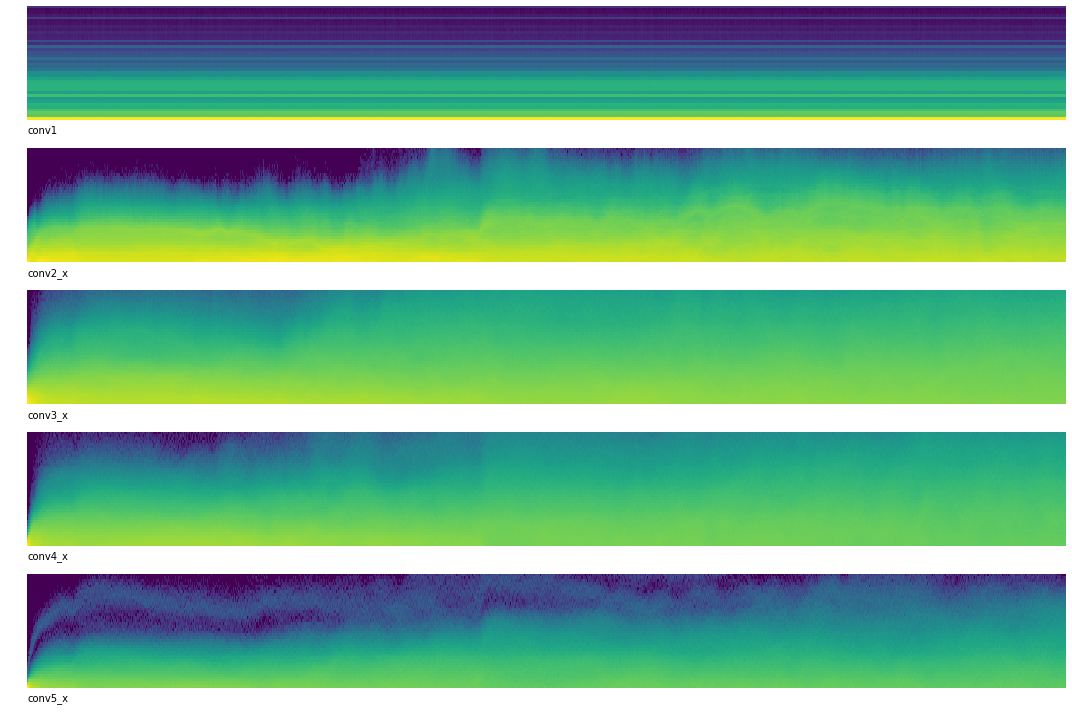

In [148]:
fig,axes = plt.subplots(5, figsize=(15,10))

for i, (ax,h) in enumerate(zip(axes.flatten(), hooks)):
    ax.imshow(get_hist(h), origin='lower', aspect='auto')
    ax.axis('off')
    ax.text(0, -5, names[i], bbox={'facecolor':'red', 'alpha':0.0, 'pad':10})
plt.tight_layout()

In [150]:
#Note: We're using a large validation size so we don't generate super wide graphs
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.5, ds_tfms=get_transforms(), size=32, num_workers=4).normalize(imagenet_stats)
learn = cnn_learner(data, models.resnet18, pretrained=True, metrics=[error_rate])

In [152]:
#Hook the output of the first conv and each resnet block.
hooks = [probeModule(learn, learn.model[0][0]),
         probeModule(learn, learn.model[0][4]),
         probeModule(learn, learn.model[0][5]),
         probeModule(learn, learn.model[0][6]),
         probeModule(learn, learn.model[0][7])]

names = ['conv1',
         'conv2_x',
         'conv3_x',
         'conv4_x',
         'conv5_x']

learn.fit(3, lr=1)

epoch,train_loss,valid_loss,error_rate,time
0,90.271645,1116491.750000,0.859229,00:23
1,67.617859,11835.192383,0.903714,00:23
2,67.747726,401.358429,0.808114,00:23


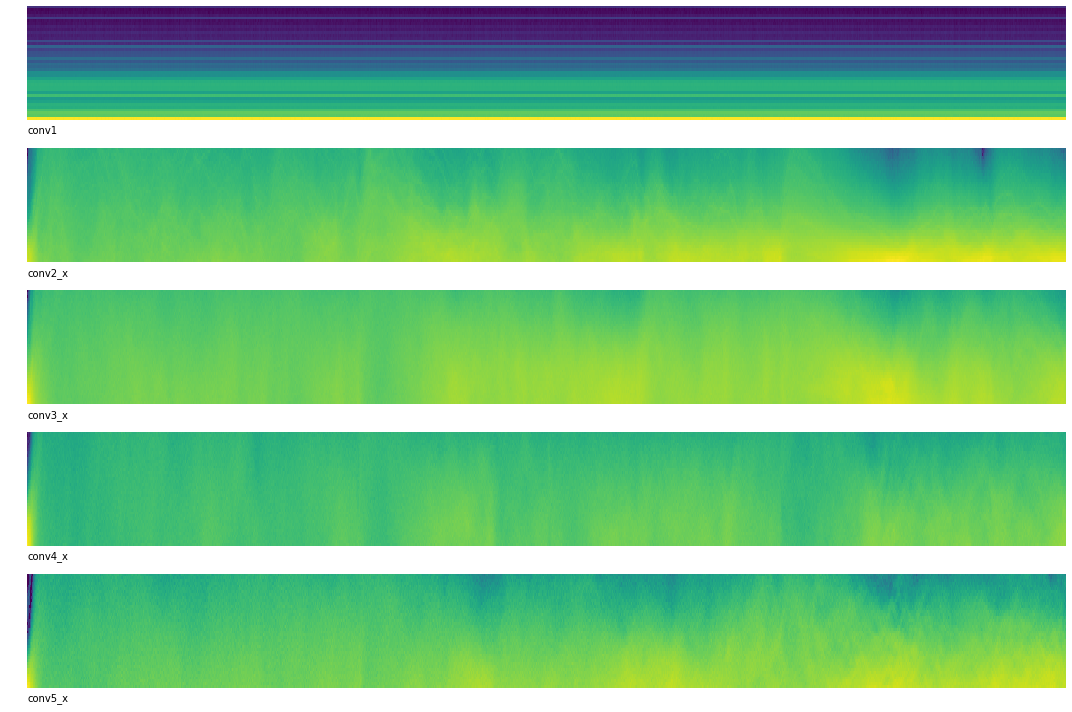

In [154]:
fig,axes = plt.subplots(5, figsize=(15,10))

for i, (ax,h) in enumerate(zip(axes.flatten(), hooks)):
    ax.imshow(get_hist(h), origin='lower', aspect='auto')
    ax.axis('off')
    ax.text(0, -5, names[i], bbox={'facecolor':'red', 'alpha':0.0, 'pad':10})
plt.tight_layout()

## Let's Break the Untrained Model

In [139]:
#Note: We're using a large validation size so we don't generate super wide graphs
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.5, ds_tfms=get_transforms(), size=32, num_workers=4).normalize(imagenet_stats)
learn = cnn_learner(data, models.resnet18, pretrained=False, metrics=[error_rate])

In [140]:
#Hook the output of the first conv and each resnet block.
hooks = [probeModule(learn, learn.model[0][0]),
         probeModule(learn, learn.model[0][4]),
         probeModule(learn, learn.model[0][5]),
         probeModule(learn, learn.model[0][6]),
         probeModule(learn, learn.model[0][7])]

names = ['conv1',
         'conv2_x',
         'conv3_x',
         'conv4_x',
         'conv5_x']

learn.fit(3, lr=1e-1)

epoch,train_loss,valid_loss,error_rate,time
0,1.380510,562.110413,0.423600,00:22
1,1.050778,0.653620,0.117429,00:21
2,1.327395,42.407204,0.116629,00:20


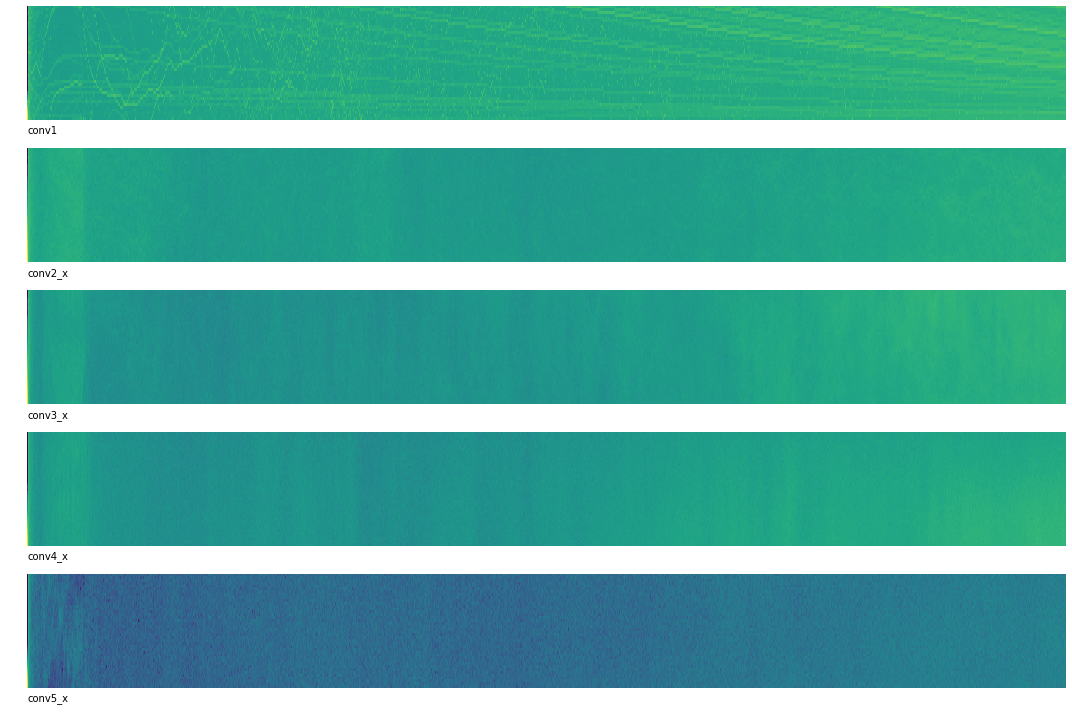

In [141]:
# Thanks to @ste for initial version of histgram plotting code
def get_hist(h): 
    return torch.stack(h.hists).t().float().log1p()

fig,axes = plt.subplots(5, figsize=(15,10))

for i, (ax,h) in enumerate(zip(axes.flatten(), hooks)):
    ax.imshow(get_hist(h), origin='lower', aspect='auto')
    ax.axis('off')
    ax.text(0, -5, names[i], bbox={'facecolor':'red', 'alpha':0.0, 'pad':10})
plt.tight_layout()

In [142]:
#Note: We're using a large validation size so we don't generate super wide graphs
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.5, ds_tfms=get_transforms(), size=32, num_workers=4).normalize(imagenet_stats)
learn = cnn_learner(data, models.resnet18, pretrained=False, metrics=[error_rate])

In [143]:
#Hook the output of the first conv and each resnet block.
hooks = [probeModule(learn, learn.model[0][0]),
         probeModule(learn, learn.model[0][4]),
         probeModule(learn, learn.model[0][5]),
         probeModule(learn, learn.model[0][6]),
         probeModule(learn, learn.model[0][7])]

names = ['conv1',
         'conv2_x',
         'conv3_x',
         'conv4_x',
         'conv5_x']

learn.fit(3, lr=1)

epoch,train_loss,valid_loss,error_rate,time
0,54.093563,96.238770,0.750857,00:22
1,51.690674,121.358231,0.829429,00:22
2,97.584045,3495.930908,0.898943,00:22


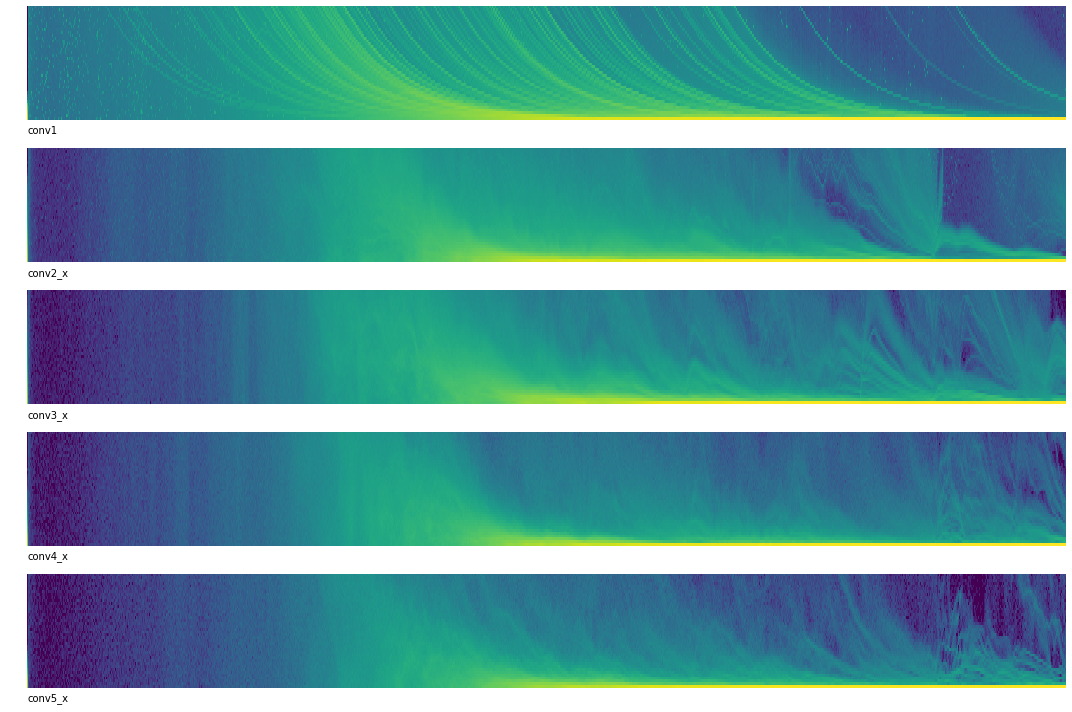

In [144]:
# Thanks to @ste for initial version of histgram plotting code
def get_hist(h): 
    return torch.stack(h.hists).t().float().log1p()

fig,axes = plt.subplots(5, figsize=(15,10))

for i, (ax,h) in enumerate(zip(axes.flatten(), hooks)):
    ax.imshow(get_hist(h), origin='lower', aspect='auto')
    ax.axis('off')
    ax.text(0, -5, names[i], bbox={'facecolor':'red', 'alpha':0.0, 'pad':10})
plt.tight_layout()

## Optional Plotting Code

If you're interested in plotting the means of the activations

In [77]:
def get_min(h):
    h1 = torch.stack(h.hists).t().float()
    return h1[:2].sum(0)/h1.sum(0)

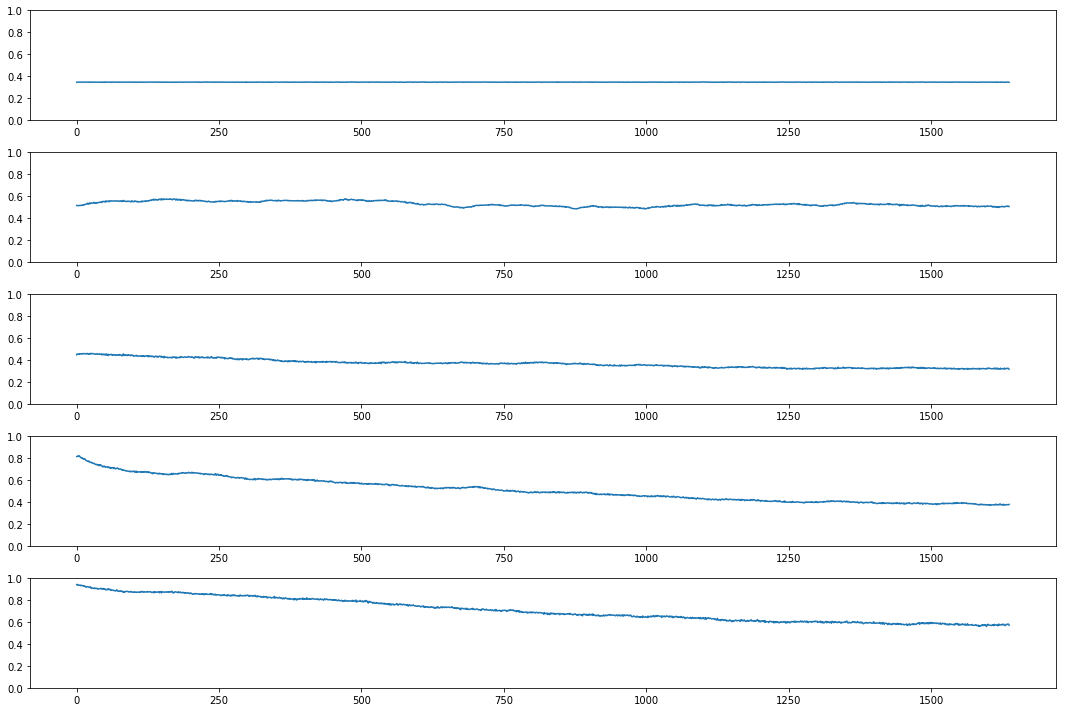

In [78]:
fig,axes = plt.subplots(5,1, figsize=(15,10))
for ax,h in zip(axes.flatten(), hooks):
    ax.plot(get_min(h))
    ax.set_ylim(0,1)
plt.tight_layout()